**Lineer Regression**

https://mlu-explain.github.io/linear-regression/

Eğim (katsayı): [2.77011339]
Kesişim (sabit): [4.21509616]
Ortalama Kare Hata (MSE): 0.8065845639670531


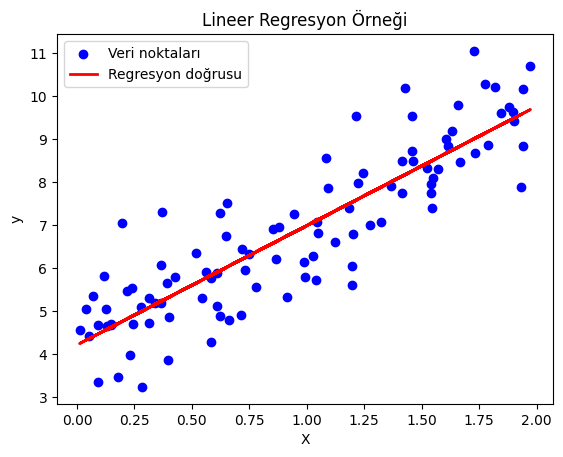

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Rastgele veri seti oluşturma
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Bağımsız değişken
y = 4 + 3 * X + np.random.randn(100, 1)  # Bağımlı değişken (gürültü eklenmiş)

# Lineer Regresyon modelini oluşturma ve eğitme
model = LinearRegression()
model.fit(X, y)

# Modelin katsayıları (eğim ve kesişim)
print("Eğim (katsayı):", model.coef_[0])
print("Kesişim (sabit):", model.intercept_)

# Tahmin yapma
y_pred = model.predict(X)

# Ortalama Kare Hata (MSE) hesaplama
mse = mean_squared_error(y, y_pred)
print("Ortalama Kare Hata (MSE):", mse)

# Veriyi ve regresyon doğrusunu görselleştirme
plt.scatter(X, y, color='blue', label='Veri noktaları')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regresyon doğrusu')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Lineer Regresyon Örneği')
plt.legend()
plt.savefig('linear_regression_plot.png')

 **Gradient Descent**

Başlangıç x: 4.0
Son x: 3.2331251098590505e-11
Son kayıp fonksiyonu değeri (f(x)): 1.0453097976001098e-21


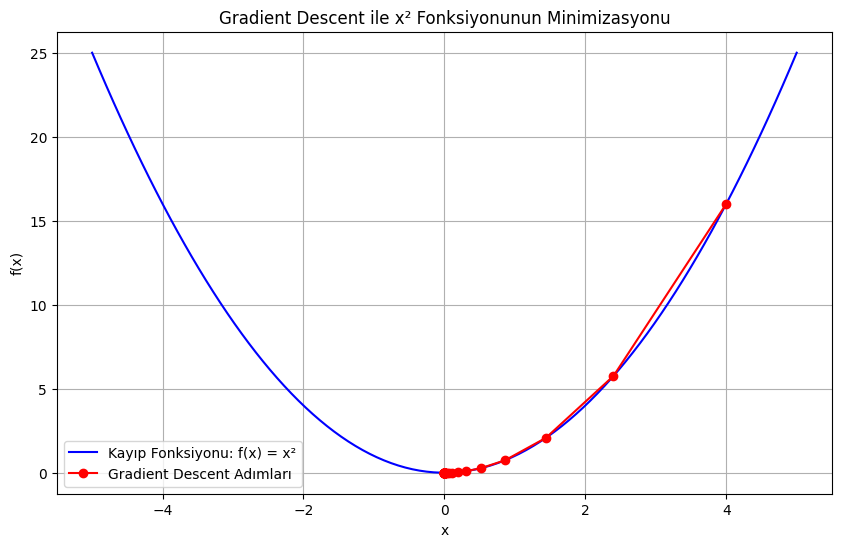

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Kayıp fonksiyonu: f(x) = x^2
def loss_function(x):
    return x**2

# Kayıp fonksiyonunun türevi (gradyan): f'(x) = 2x
def gradient(x):
    return 2 * x

# Gradient Descent parametreleri
learning_rate = 0.2  # Öğrenme oranı
n_iterations = 50    # İterasyon sayısı
x_initial = 4.0      # Başlangıç noktası

# Gradient Descent
x = x_initial
x_history = [x]  # x değerlerini kaydetmek için liste

for i in range(n_iterations):
    grad = gradient(x)  # Gradyanı hesapla
    x = x - learning_rate * grad  # x'i güncelle
    x_history.append(x)  # Yeni x'i kaydet

# Sonuçları yazdırma
print("Başlangıç x:", x_initial)
print("Son x:", x)
print("Son kayıp fonksiyonu değeri (f(x)):", loss_function(x))

# Görselleştirme
x_range = np.linspace(-5, 5, 100)
y_range = loss_function(x_range)

plt.figure(figsize=(10, 6))
plt.plot(x_range, y_range, 'b-', label='Kayıp Fonksiyonu: f(x) = x²')
plt.plot(x_history, [loss_function(x) for x in x_history], 'ro-', label='Gradient Descent Adımları')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent ile x² Fonksiyonunun Minimizasyonu')
plt.legend()
plt.grid(True)
plt.savefig('gradient_descent_non_linear_plot.png')

**Logistic Regression**

Doğruluk Skoru: 1.0
Karışıklık Matrisi:
 [[13  0]
 [ 0  7]]


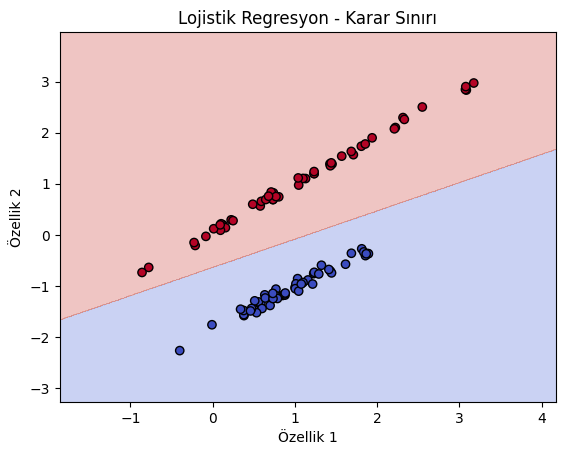

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Sentetik veri seti oluşturma
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1,
                          n_informative=2, n_redundant=0, random_state=42)

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lojistik Regresyon modelini oluşturma ve eğitme
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Doğruluk skoru ve karışıklık matrisi
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Doğruluk Skoru:", accuracy)
print("Karışıklık Matrisi:\n", conf_matrix)

# Karar sınırını görselleştirme
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.title('Lojistik Regresyon - Karar Sınırı')
plt.savefig('logistic_regression_plot.png')

**Naive Bayes**

Doğruluk Skoru: 0.6666666666666666
Karışıklık Matrisi:
 [[1 1]
 [0 1]]

Yeni E-posta Tahminleri:
E-posta: click to win free prize -> Spam
E-posta: team meeting at 2pm -> Ham


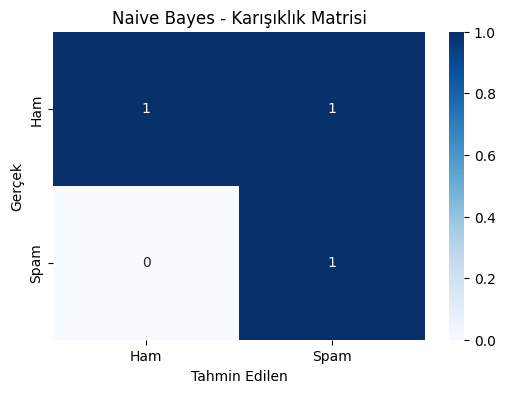

In [6]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Sentetik e-posta veri seti oluşturma
emails = [
    "win free money now click here",
    "hello friend how are you",
    "claim your prize today urgent",
    "meeting tomorrow at 10am",
    "discount offer buy now cheap",
    "project update please review",
    "free gift card click to win",
    "lunch plan today with team",
    "limited time offer act now",
    "happy birthday wish you best"
]
labels = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]  # 1: Spam, 0: Ham

# Veriyi DataFrame'e dönüştürme
data = pd.DataFrame({'email': emails, 'label': labels})

# Metin verisini sayısal özelliklere dönüştürme
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['email'])
y = data['label']

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive Bayes modelini oluşturma ve eğitme
model = MultinomialNB()
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Doğruluk skoru ve karışıklık matrisi
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Doğruluk Skoru:", accuracy)
print("Karışıklık Matrisi:\n", conf_matrix)

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Naive Bayes - Karışıklık Matrisi')
plt.savefig('naive_bayes_confusion_matrix.png')

# Yeni e-posta testi
new_emails = ["click to win free prize", "team meeting at 2pm"]
new_emails_transformed = vectorizer.transform(new_emails)
predictions = model.predict(new_emails_transformed)
print("\nYeni E-posta Tahminleri:")
for email, pred in zip(new_emails, predictions):
    print(f"E-posta: {email} -> {'Spam' if pred == 1 else 'Ham'}")

**Knn(K-nearest Neighbors)**

Doğruluk Skoru: 0.7555555555555555
Karışıklık Matrisi:
 [[19  0  0]
 [ 0  7  6]
 [ 0  5  8]]

Yeni Veri Noktası Tahminleri:
Veri: [5. 3.] -> setosa
Veri: [6.  2.5] -> versicolor


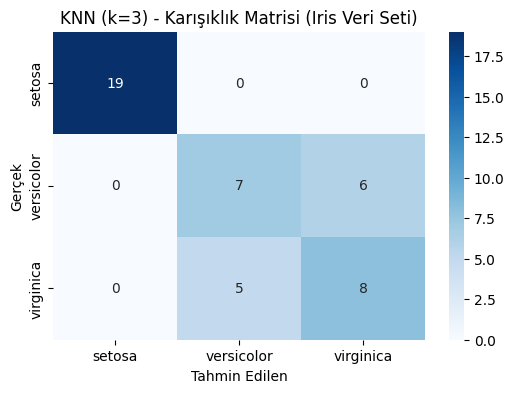

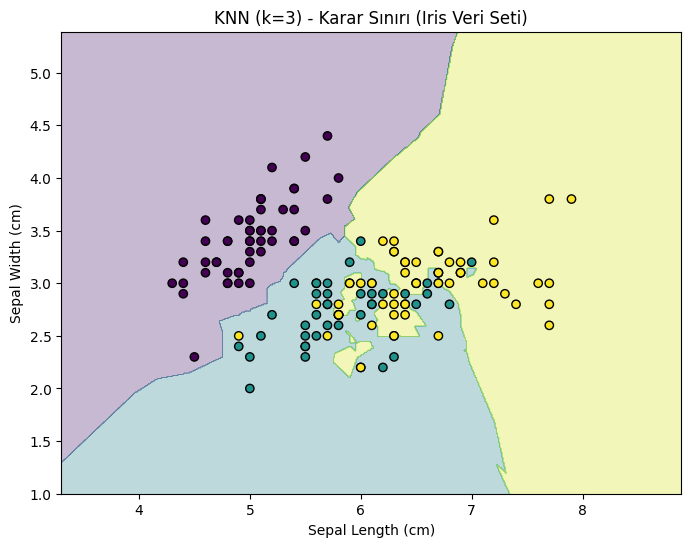

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Iris veri setini yükleme
iris = load_iris()
X = iris.data[:, :2]  # İlk iki özelliği (sepal length, sepal width) kullan
y = iris.target

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# KNN modelini oluşturma ve eğitme
k = 3  # Komşu sayısı
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Doğruluk skoru ve karışıklık matrisi
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Doğruluk Skoru:", accuracy)
print("Karışıklık Matrisi:\n", conf_matrix)

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title(f'KNN (k={k}) - Karışıklık Matrisi (Iris Veri Seti)')
plt.savefig('knn_iris_confusion_matrix.png')

# Karar sınırını görselleştirme
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title(f'KNN (k={k}) - Karar Sınırı (Iris Veri Seti)')
plt.savefig('knn_iris_decision_boundary.png')

# Yeni veri noktası testi
new_data = np.array([[5.0, 3.0], [6.0, 2.5]])  # Örnek yeni veri noktaları
new_predictions = model.predict(new_data)
print("\nYeni Veri Noktası Tahminleri:")
for data, pred in zip(new_data, new_predictions):
    print(f"Veri: {data} -> {iris.target_names[pred]}")

**Support Vector Machine (SVM)**

Doğruluk Skoru: 0.85
Karışıklık Matrisi:
 [[27  7]
 [ 2 24]]

Yeni Veri Noktası Tahminleri:
Veri: [0. 0.] -> Riskli
Veri: [1.5 1.5] -> Risksiz


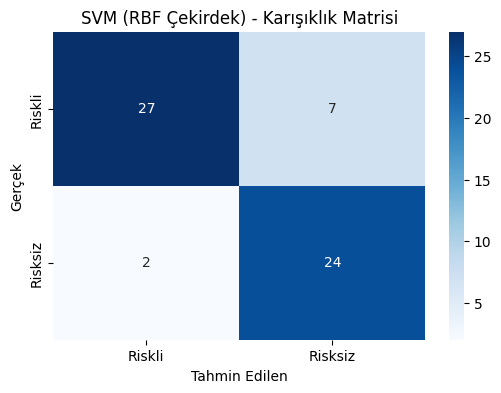

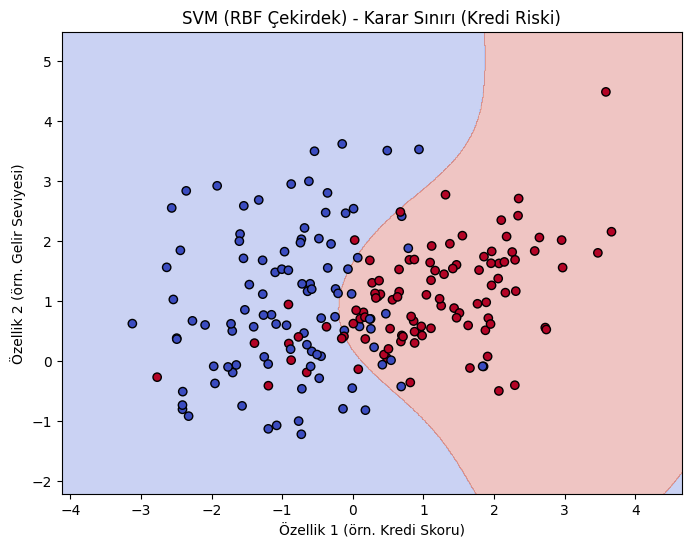

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Sentetik veri seti oluşturma (kredi riski tahmini: risksiz=1, riskli=0)
np.random.seed(42)
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_clusters_per_class=1,
                          n_informative=2, n_redundant=0, random_state=42)

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVM modelini oluşturma ve eğitme
model = SVC(kernel='rbf', C=1.0, random_state=42)  # RBF çekirdeği kullanıyoruz
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Doğruluk skoru ve karışıklık matrisi
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Doğruluk Skoru:", accuracy)
print("Karışıklık Matrisi:\n", conf_matrix)

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Riskli', 'Risksiz'], yticklabels=['Riskli', 'Risksiz'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('SVM (RBF Çekirdek) - Karışıklık Matrisi')
plt.savefig('svm_credit_risk_confusion_matrix.png')

# Karar sınırını görselleştirme
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
plt.xlabel('Özellik 1 (örn. Kredi Skoru)')
plt.ylabel('Özellik 2 (örn. Gelir Seviyesi)')
plt.title('SVM (RBF Çekirdek) - Karar Sınırı (Kredi Riski)')
plt.savefig('svm_credit_risk_decision_boundary.png')

# Yeni veri noktası testi
new_data = np.array([[0, 0], [1.5, 1.5]])  # Örnek yeni veri noktaları
new_predictions = model.predict(new_data)
print("\nYeni Veri Noktası Tahminleri:")
for data, pred in zip(new_data, new_predictions):
    print(f"Veri: {data} -> {'Risksiz' if pred == 1 else 'Riskli'}")

**Random Forest**


Doğruluk Skoru: 0.3333333333333333
Karışıklık Matrisi:
 [[23 23 45]
 [21 21 43]
 [40 28 56]]

Yeni Veri Noktası Tahminleri:
Veri: {'temperature': 25.0, 'humidity': 60.0, 'wind_speed': 10.0} -> Sunny
Veri: {'temperature': 15.0, 'humidity': 90.0, 'wind_speed': 20.0} -> Sunny


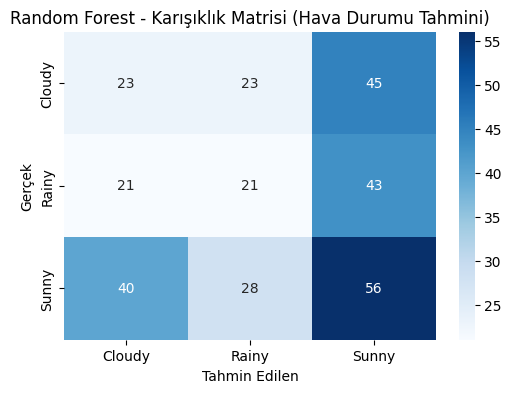

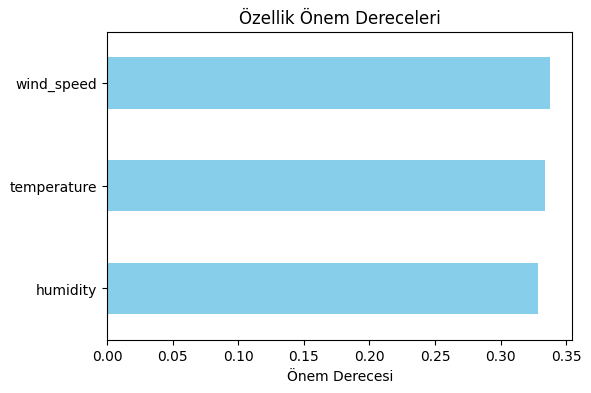

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Sentetik hava durumu veri seti oluşturma
np.random.seed(42)
n_samples = 1000
data = {
    'temperature': np.random.uniform(0, 40, n_samples),  # Sıcaklık (°C)
    'humidity': np.random.uniform(20, 100, n_samples),  # Nem (%)
    'wind_speed': np.random.uniform(0, 30, n_samples),  # Rüzgar hızı (km/s)
    'weather': np.random.choice(['Sunny', 'Cloudy', 'Rainy'], n_samples, p=[0.4, 0.3, 0.3])
}
df = pd.DataFrame(data)

# Kategorik hedef değişkeni sayısala çevirme
le = LabelEncoder()
df['weather'] = le.fit_transform(df['weather'])

# Özellikler ve hedef değişken
X = df[['temperature', 'humidity', 'wind_speed']]
y = df['weather']

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest modelini oluşturma ve eğitme
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Doğruluk skoru ve karışıklık matrisi
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Doğruluk Skoru:", accuracy)
print("Karışıklık Matrisi:\n", conf_matrix)

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Random Forest - Karışıklık Matrisi (Hava Durumu Tahmini)')
plt.savefig('random_forest_weather_confusion_matrix.png')

# Özellik önem derecelerini görselleştirme
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(6, 4))
feature_importance.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Önem Derecesi')
plt.title('Özellik Önem Dereceleri')
plt.savefig('random_forest_weather_feature_importance.png')

# Yeni veri noktası testi
new_data = pd.DataFrame({
    'temperature': [25.0, 15.0],
    'humidity': [60.0, 90.0],
    'wind_speed': [10.0, 20.0]
})
new_predictions = model.predict(new_data)
print("\nYeni Veri Noktası Tahminleri:")
for i, pred in enumerate(new_predictions):
    print(f"Veri: {new_data.iloc[i].to_dict()} -> {le.inverse_transform([pred])[0]}")

Ortalama Kare Hata (MSE): 880480947.185902
R² Skoru: 0.9621441306073966
Eğitim Süresi (saniye): 2.4099152088165283

Yeni Veri Noktası Tahminleri:
Veri: {'house_size': 150.0, 'bedrooms': 3.0, 'neighborhood_quality': 7.0, 'age': 10.0} -> Tahmin Edilen Fiyat: $420920.41
Veri: {'house_size': 200.0, 'bedrooms': 4.0, 'neighborhood_quality': 5.0, 'age': 20.0} -> Tahmin Edilen Fiyat: $506362.28


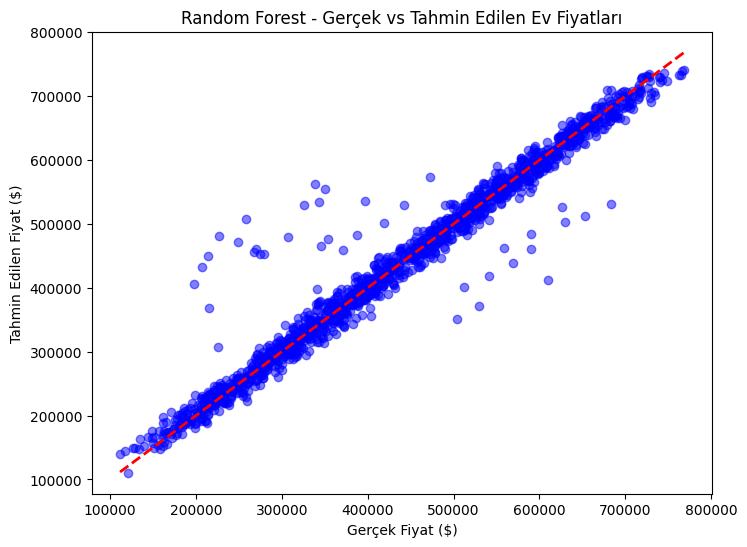

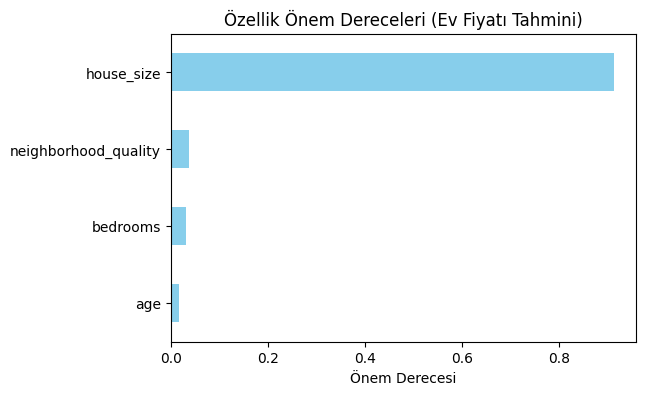

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import time

# Sentetik ev fiyatı veri seti oluşturma
np.random.seed(42)
n_samples = 5000  # 5.000 örnek
data = {
    'house_size': np.random.uniform(50, 300, n_samples),       # Ev büyüklüğü (m²)
    'bedrooms': np.random.randint(1, 6, n_samples),           # Yatak odası sayısı
    'neighborhood_quality': np.random.uniform(1, 10, n_samples),  # Mahalle kalitesi (1-10)
    'age': np.random.uniform(0, 50, n_samples),              # Ev yaşı (yıl)
    'price': np.zeros(n_samples)                             # Hedef: Ev fiyatı ($)
}

# Fiyatları simüle etme (basit bir formül + gürültü)
df = pd.DataFrame(data)
df['price'] = (df['house_size'] * 2000 + df['bedrooms'] * 20000 + df['neighborhood_quality'] * 10000 - df['age'] * 1000 +
               np.random.normal(0, 10000, n_samples))

# Eksik veri simülasyonu (gerçekçi bir senaryo için)
df.loc[np.random.choice(df.index, size=int(0.03 * n_samples)), 'house_size'] = np.nan

# Özellikler ve hedef değişken
X = df[['house_size', 'bedrooms', 'neighborhood_quality', 'age']]
y = df['price']

# Özellik ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Random Forest Regressor modelini oluşturma ve eğitme
start_time = time.time()
model = RandomForestRegressor(n_estimators=100, max_depth=10, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)
training_time = time.time() - start_time

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Değerlendirme metrikleri
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Ortalama Kare Hata (MSE):", mse)
print("R² Skoru:", r2)
print("Eğitim Süresi (saniye):", training_time)

# Gerçek ve tahmin edilen fiyatların görselleştirilmesi
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Gerçek Fiyat ($)')
plt.ylabel('Tahmin Edilen Fiyat ($)')
plt.title('Random Forest - Gerçek vs Tahmin Edilen Ev Fiyatları')
plt.savefig('random_forest_house_price_scatter.png')

# Özellik önem derecelerini görselleştirme
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(6, 4))
feature_importance.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Önem Derecesi')
plt.title('Özellik Önem Dereceleri (Ev Fiyatı Tahmini)')
plt.savefig('random_forest_house_price_feature_importance.png')

# Yeni veri noktası testi
new_data = pd.DataFrame({
    'house_size': [150.0, 200.0],
    'bedrooms': [3, 4],
    'neighborhood_quality': [7.0, 5.0],
    'age': [10.0, 20.0]
})
new_data_scaled = scaler.transform(new_data)
new_predictions = model.predict(new_data_scaled)
print("\nYeni Veri Noktası Tahminleri:")
for i, pred in enumerate(new_predictions):
    print(f"Veri: {new_data.iloc[i].to_dict()} -> Tahmin Edilen Fiyat: ${pred:.2f}")

**Kümeleme**

**Centroid/K-means**

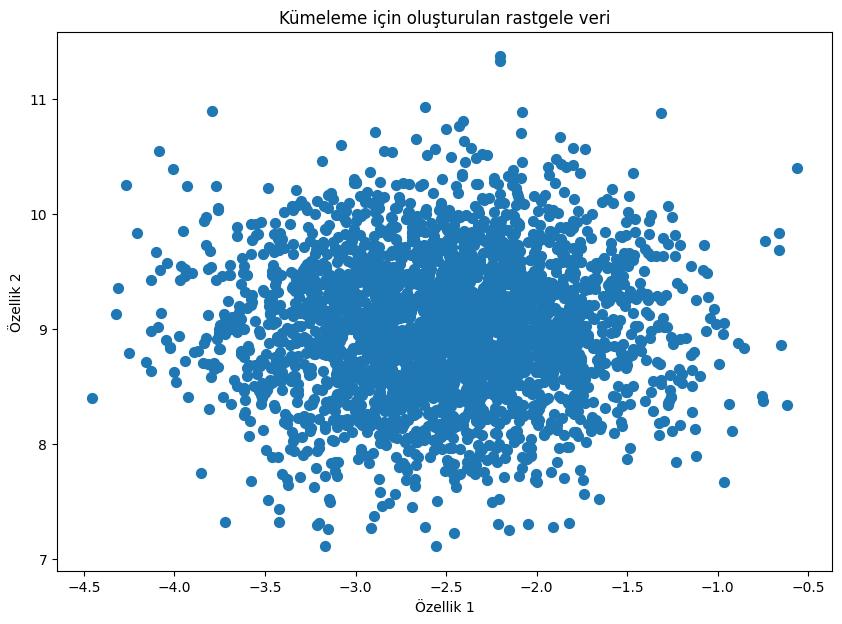

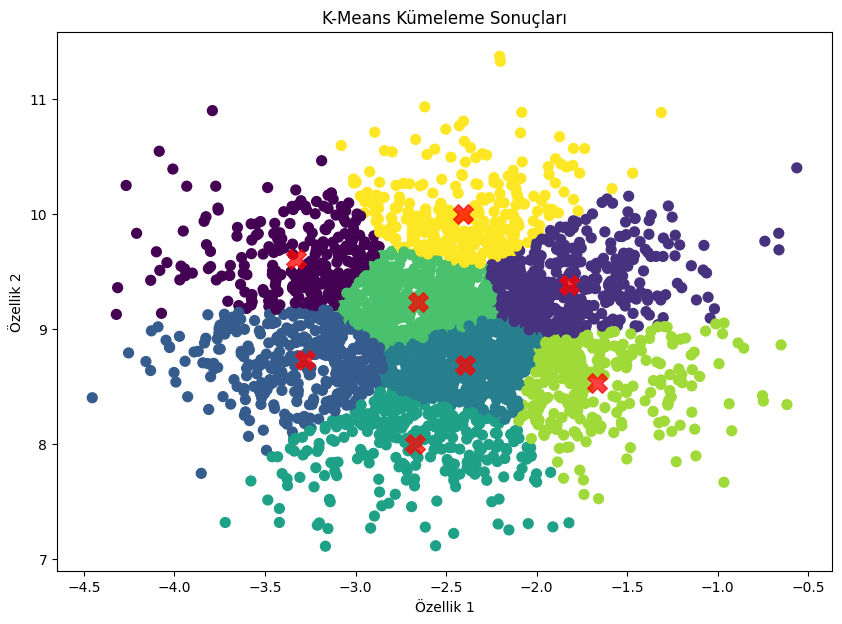

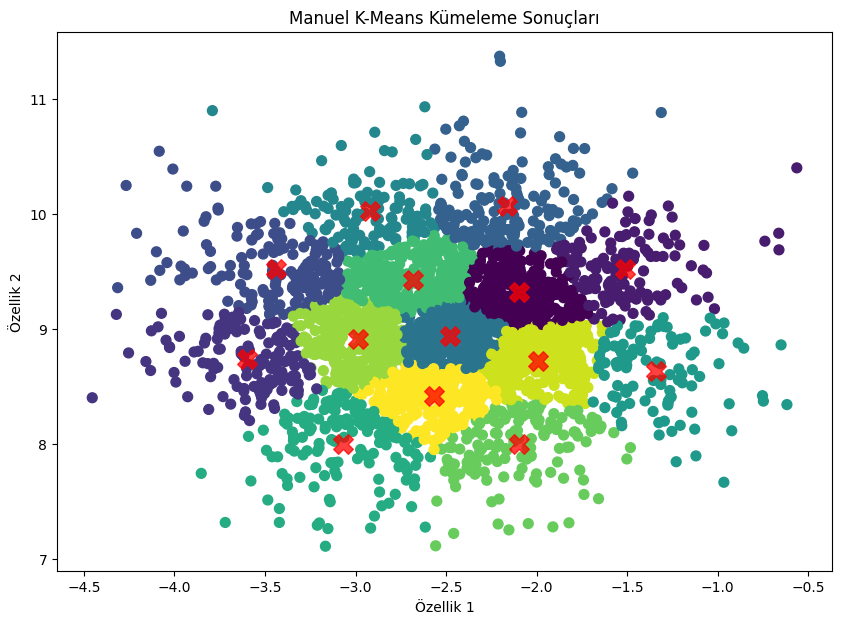

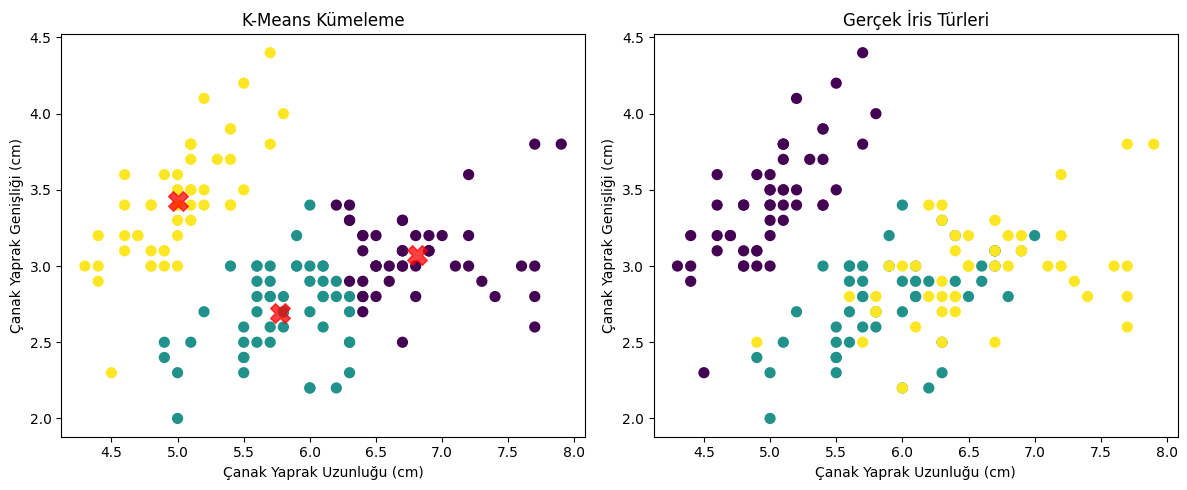

Kümeleme Analizi Tamamlandı!


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Rastgele veri oluştur
X, y_true = make_blobs(
    n_samples=3000,
    centers=1,
    cluster_std=0.60,
    random_state=42
)

# Veri noktalarını görselleştir
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Kümeleme için oluşturulan rastgele veri")
plt.xlabel("Özellik 1")
plt.ylabel("Özellik 2")
plt.show()

# K-Means modelini oluştur ve eğit
kmeans = KMeans(n_clusters=8, random_state=42, n_init=10)
kmeans.fit(X)

# Küme merkezlerini ve etiketleri al
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

# Sonuçları görselleştir
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("K-Means Kümeleme Sonuçları")
plt.xlabel("Özellik 1")
plt.ylabel("Özellik 2")
plt.show()

# Manuel K-Means algoritması uygulaması
def euclidean_distance(a, b):
    """İki nokta arasındaki Öklid mesafesini hesaplar"""
    return np.sqrt(np.sum((a - b) ** 2))

def kmeans_manual(X, k=14, max_iters=100):
    """
    Manuel K-Means algoritması

    Parametreler:
    X: Veri noktaları
    k: Küme sayısı
    max_iters: Maksimum iterasyon sayısı

    Dönüş:
    labels: Her veri noktasının küme etiketi
    centroids: Küme merkezleri
    """
    # Rastgele k merkez seç
    idx = np.random.choice(len(X), k, replace=False)
    centroids = X[idx]

    # Maksimum iterasyon sayısı kadar döngü
    for _ in range(max_iters):
        # Her noktanın en yakın merkezini bul
        clusters = [[] for _ in range(k)]
        for i, point in enumerate(X):
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(i)

        # Merkez pozisyonlarını güncelle
        old_centroids = centroids.copy()
        for i in range(k):
            if clusters[i]:
                centroids[i] = np.mean(X[clusters[i]], axis=0)

        # Merkezler değişmediyse dur
        if np.all(old_centroids == centroids):
            break

    # Noktaları kümelerine göre etiketle
    labels = np.zeros(len(X), dtype=int)
    for i in range(k):
        for idx in clusters[i]:
            labels[idx] = i

    return labels, centroids

# Manuel K-Means algoritmasını çalıştır
manual_labels, manual_centers = kmeans_manual(X)

# Manuel K-Means sonuçlarını görselleştir
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=manual_labels, s=50, cmap='viridis')
plt.scatter(manual_centers[:, 0], manual_centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("Manuel K-Means Kümeleme Sonuçları")
plt.xlabel("Özellik 1")
plt.ylabel("Özellik 2")
plt.show()

# Gerçek veriler üzerinde örnek: İris veri seti
from sklearn.datasets import load_iris

iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# İris veri setinde 2 boyuta indirgeme (basitlik için)
X_iris_2d = X_iris[:, :2]  # Sadece ilk iki özelliği al

# K-Means modelini oluştur ve eğit
kmeans_iris = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_iris.fit(X_iris_2d)

# Küme merkezlerini ve etiketleri al
y_kmeans_iris = kmeans_iris.predict(X_iris_2d)
centers_iris = kmeans_iris.cluster_centers_

# Sonuçları görselleştir
plt.figure(figsize=(12, 5))

# Sol taraf: K-Means kümeleme sonuçları
plt.subplot(1, 2, 1)
plt.scatter(X_iris_2d[:, 0], X_iris_2d[:, 1], c=y_kmeans_iris, s=50, cmap='viridis')
plt.scatter(centers_iris[:, 0], centers_iris[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("K-Means Kümeleme")
plt.xlabel("Çanak Yaprak Uzunluğu (cm)")
plt.ylabel("Çanak Yaprak Genişliği (cm)")

# Sağ taraf: Gerçek sınıf etiketleri
plt.subplot(1, 2, 2)
plt.scatter(X_iris_2d[:, 0], X_iris_2d[:, 1], c=y_iris, s=50, cmap='viridis')
plt.title("Gerçek İris Türleri")
plt.xlabel("Çanak Yaprak Uzunluğu (cm)")
plt.ylabel("Çanak Yaprak Genişliği (cm)")

plt.tight_layout()
plt.show()

print("Kümeleme Analizi Tamamlandı!")